<a href="https://colab.research.google.com/github/2840bongkoch/BSC_DPDM2025/blob/main/Ch5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [23]:
from sklearn.datasets import load_digits
# Load the digits dataset (a modified MNIST dataset)
digits = load_digits()
X, y = digits.data, digits.target

print(f"Shape of data: {X.shape}")
print(f"Shape of target: {y.shape}")
print(f"Number of classes : {len(digits.target_names)}")
print(f"First 5 target labels: {y[:5]}")

Shape of data: (1797, 64)
Shape of target: (1797,)
Number of classes : 10
First 5 target labels: [0 1 2 3 4]


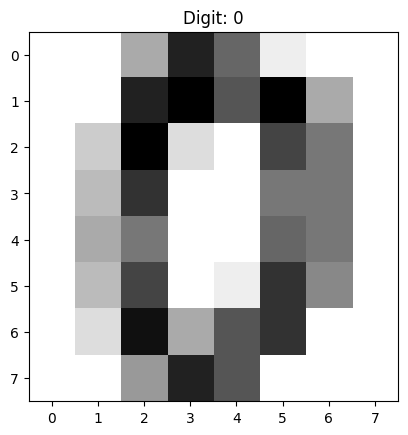

In [24]:
import matplotlib.pyplot as plt

# Get the first image and its target label
first_image = X[0]
first_label = y[0]

# Reshape the 64-feature vector to an 8x8 image
image_reshaped = first_image.reshape(8, 8)

# Display the image
plt.imshow(image_reshaped, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Digit: {first_label}")
plt.show()

In [21]:
import pandas as pd

# Create a DataFrame for the features (pixel data)
df = pd.DataFrame(digits.data)

# Add the target (digit label) as a new column
df['target'] = digits.target

print("DataFrame created successfully with shape:", df.shape)

DataFrame created successfully with shape: (1797, 65)


In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [17]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [25]:
X.shape

(1797, 64)

In [26]:
X_train = X[:1700]
y_train = y[:1700]
X_test = X[1700:]
y_test = y[1700:]

# Model Construction
- import
- define (hyper-parameter)
- train (fitting)
- evaluate (train vs test)

## import

In [28]:
from sklearn.tree import DecisionTreeClassifier

## define

In [40]:
tree0 = DecisionTreeClassifier(random_state=6)

## training

In [42]:
tree0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=6)

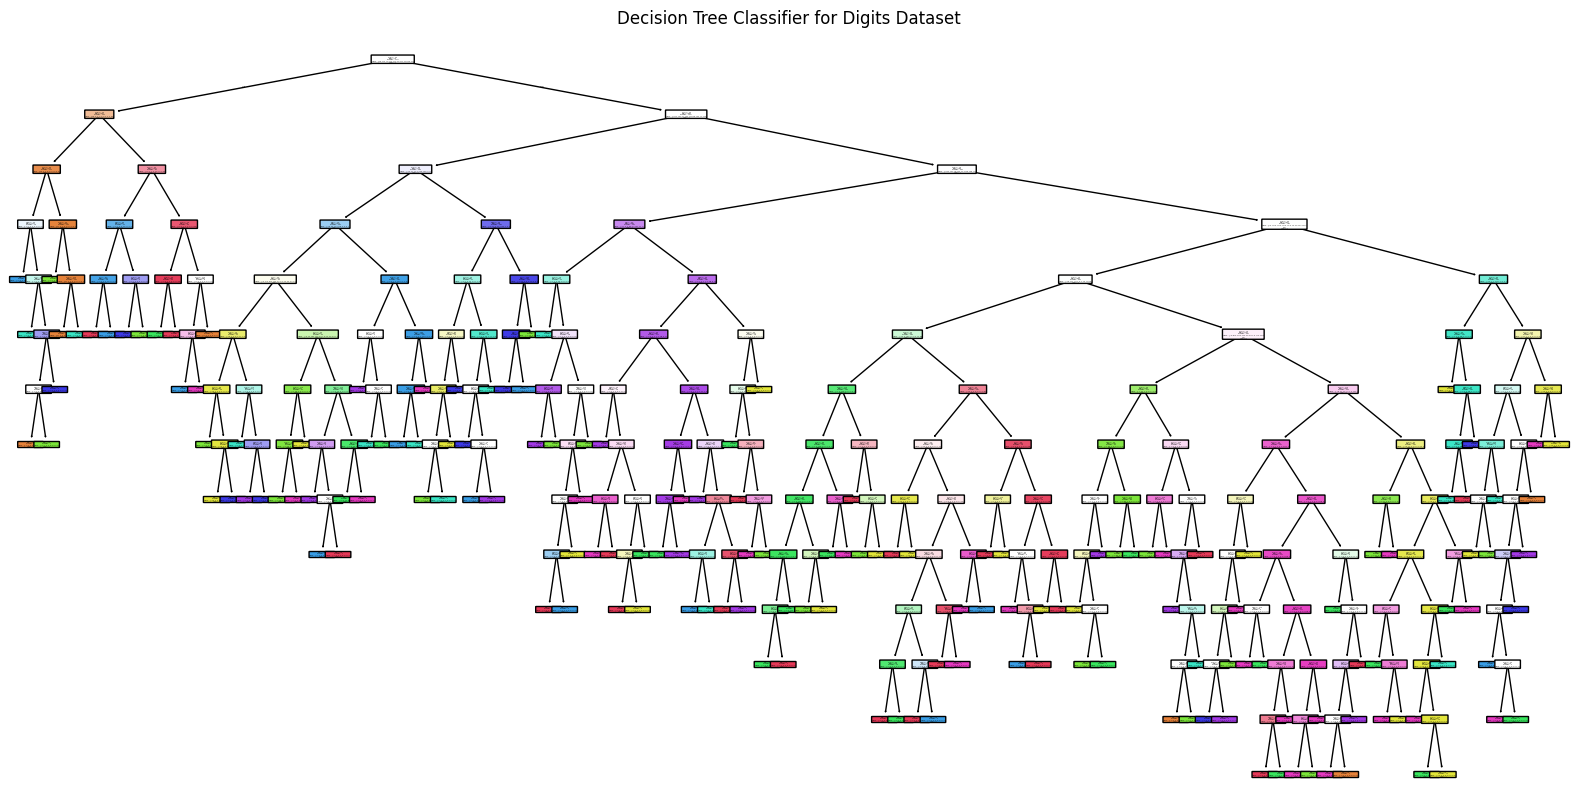

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree0, filled=True, rounded=True, class_names=digits.target_names.astype(str))
plt.title("Decision Tree Classifier for Digits Dataset")
plt. show()

## Evaluate

In [45]:
y_predict = tree0.predict(X_test)

In [46]:
y_predict

array([8, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 9, 5, 1, 0, 0, 6, 2, 7, 8, 2,
       0, 3, 8, 6, 8, 8, 7, 4, 3, 4, 6, 6, 6, 4, 9, 1, 9, 0, 9, 6, 7, 8,
       2, 0, 0, 6, 7, 6, 8, 2, 1, 7, 4, 6, 3, 1, 2, 9, 1, 7, 6, 8, 4, 8,
       1, 4, 0, 5, 5, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 5, 2, 2, 5, 7, 9, 4,
       4, 3, 3, 4, 9, 0, 8, 9, 8])

In [47]:
y_test

array([5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2,
       0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8,
       2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3,
       1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 8, 8, 4, 9, 0, 8, 9, 8])

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test, y_predict)

0.7938144329896907

## Pre-prining (hyoer-parameter tuning)

In [53]:
from sklearn.tree import DecisionTreeClassifier #import
tree1 = DecisionTreeClassifier(random_state=6, max_depth=3) #define
tree1.fit(X_train, y_train) #train

DecisionTreeClassifier(max_depth=3, random_state=6)

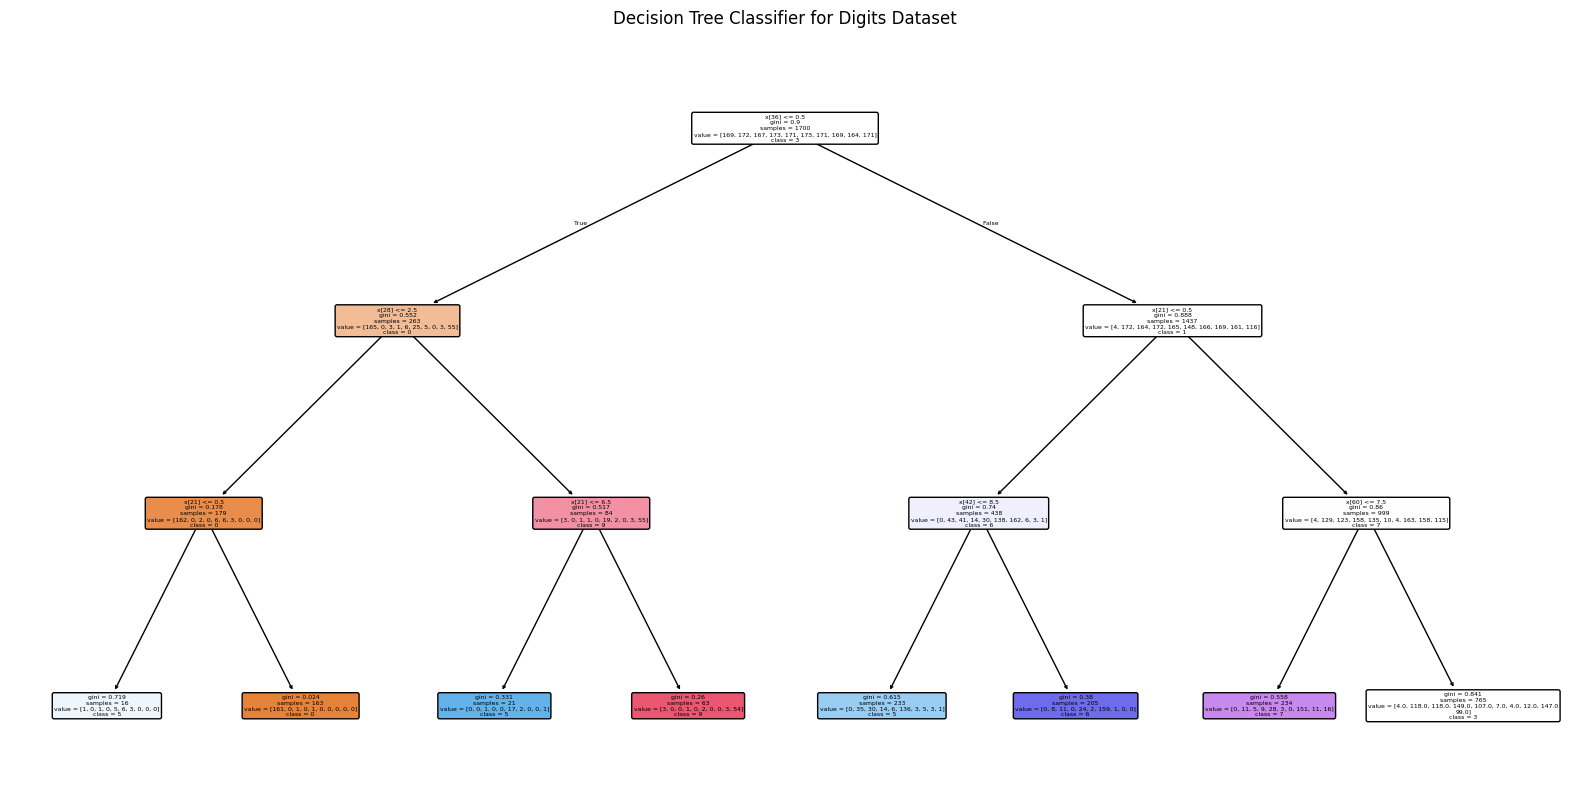

In [55]:
plt.figure(figsize=(20,10))
plot_tree(tree1, filled=True, rounded=True, class_names=digits.target_names.astype(str))
plt.title("Decision Tree Classifier for Digits Dataset")
plt.show()

## Evaluate V1

In [68]:
y_predict1 = tree1.predict(X_test)
accuracy_score(y_test, y_predict)

0.4639175257731959

# Tree2

In [70]:
from sklearn.tree import DecisionTreeClassifier #import
tree2 = DecisionTreeClassifier(random_state=6, max_depth=7) #define
tree2.fit(X_train, y_train) #train
y_predict2 = tree2.predict(X_test)
accuracy_score(y_test, y_predict2)

0.7938144329896907

# Quiz 11

In [84]:
from sklearn.tree import DecisionTreeClassifier #import
tree2 = DecisionTreeClassifier(random_state=6, max_depth=7, min_samples_split=10,min_samples_leaf=5, criterion='entropy') #define
tree2.fit(X_train, y_train) #train
y_predict2 = tree2.predict(X_test)
accuracy_score(y_test, y_predict2)

0.8865979381443299